In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_edges_from([(1, 2), (2, 3), (1, 3), (1, 4), (2, 4), (3, 4)])

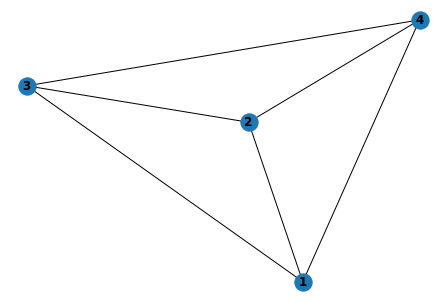

In [4]:
nx.draw(G, with_labels=True, font_weight='bold')

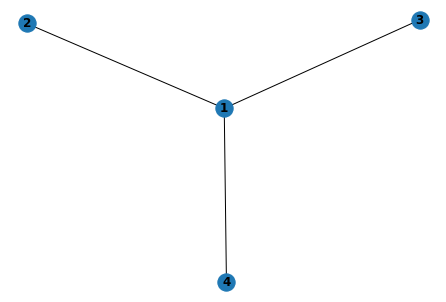

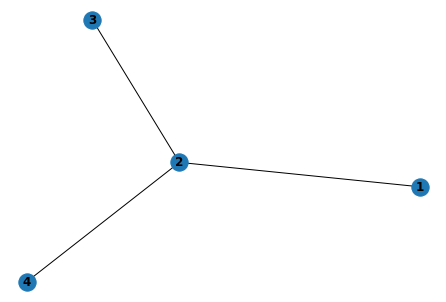

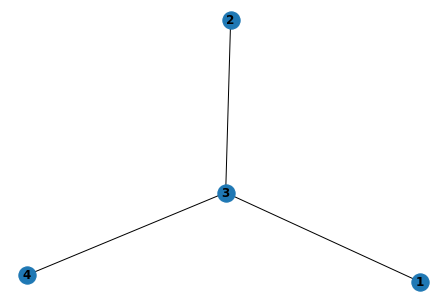

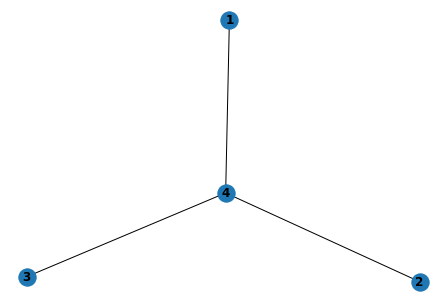

In [5]:
for n, ngbrs in G.adj.items():
    k = nx.Graph()
    k.add_edges_from([(n, ngbr) for ngbr in ngbrs.keys()])

    plt.figure()
    nx.draw(k, with_labels=True, font_weight='bold')

plt.show()